In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Uang\ Baru\ Testing

/content/drive/MyDrive/Uang Baru Testing


In [3]:
class Config:
    img_height = 200
    img_width = 200
    epochs = 50
    batch_size = 32
    learning_rate = 1e-3

In [4]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np

# Load model
model = load_model('/content/drive/MyDrive/Projek AI/model.keras')


In [5]:
currency_nominal = ['10 k', '100 RB', '1k', '20 K', '2k', '50 K', '5k']

In [9]:
from tensorflow.keras.utils import load_img, img_to_array

# Path ke gambar uji
test_image_path = '/content/drive/MyDrive/Uang Baru Testing/Test6.jpg'

# Load dan proses gambar
test_img = load_img(test_image_path, target_size=(Config.img_height, Config.img_width))
test_img_array = img_to_array(test_img)  # Konversi ke array
test_img_array = tf.expand_dims(test_img_array, 0)  # Tambahkan dimensi batch


In [10]:
predictions = model.predict(test_img_array)
score = tf.nn.softmax(predictions[0])

# Menampilkan hasil prediksi
predicted_label = currency_nominal[np.argmax(score)]
confidence = 100 * np.max(score)

print(f"Gambar diprediksi sebagai: {predicted_label} dengan keyakinan {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Gambar diprediksi sebagai: 5k dengan keyakinan 99.87%


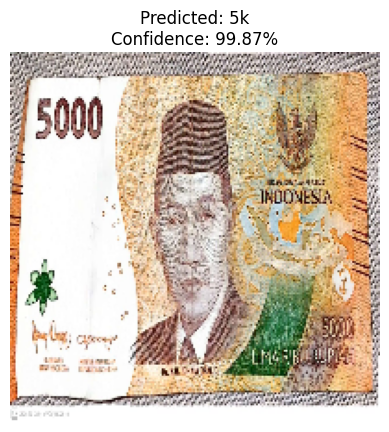

In [11]:
import matplotlib.pyplot as plt

plt.imshow(test_img)
plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
plt.axis('off')
plt.show()
